<a href="https://colab.research.google.com/github/MAboElFottouh/AMIT/blob/main/Website_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [ ]:
data = pd.read_csv("/content/Website Phishing.csv")


In [ ]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (1353, 10)


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [ ]:
data.isna().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

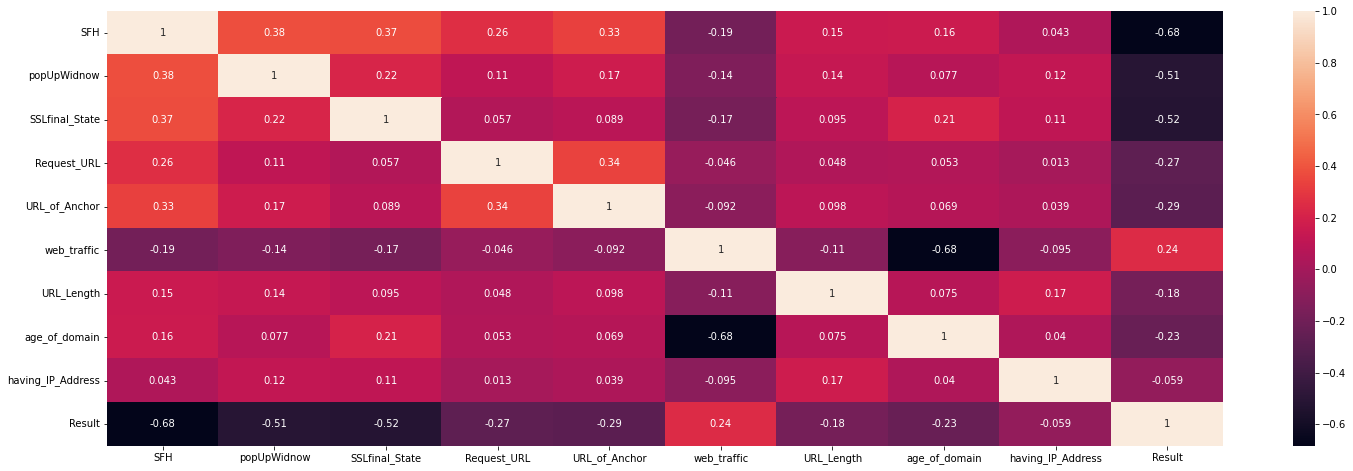

In [ ]:
plt.figure(figsize=(25,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['Result'].unique()

array([ 0,  1, -1])

#Check Balancing

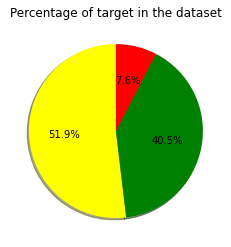

In [ ]:
from matplotlib import pyplot as plt
sizes = data['Result'].value_counts(sort = True)
colors = ["yellow","green",'red'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y=data.iloc[:,-1].values
X=data.iloc[:,:-1].values
#train_X,test_X,train_y,test_y = train_test_split(X,y)

#over_sampling

In [ ]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(data.Result.values)))
smote=SMOTE()

X_ov,y_ov=smote.fit_resample(data.iloc[:,:-1],data.iloc[:,-1])
print("After OverSampling count of labels : {} ".format(Counter(y_ov)))

Before OverSampling count of labels : Counter({-1: 702, 1: 548, 0: 103}) 
After OverSampling count of labels : Counter({0: 702, 1: 702, -1: 702}) 


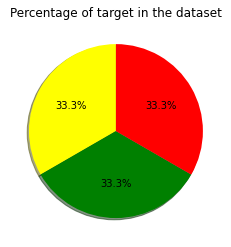

In [ ]:
from matplotlib import pyplot as plt
sizes = y_ov.value_counts(sort = True)
colors = ["yellow","green",'red'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(X_ov,y_ov)

#Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier and fit it to our training data
model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=model.predict(train_X)


print("Accuracy train :" ,accuracy_score(train_y,y_pred))
#On test Set 
y_pred=model.predict(test_X)

print("Accuracy test :" ,accuracy_score(test_y,y_pred))

Accuracy train : 0.9715009499683344
Accuracy test : 0.9506641366223909
